IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M5\FAULT_M5_5


VOLO m5 FAULT 5%

In [3]:
rcou_m5_fault5 = pd.read_csv("RCOU.csv")
rcou_m5_fault5 = rcou_m5_fault5.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m5_fault5 = rcou_m5_fault5[((rcou_m5_fault5['C9'] >= 1400) & (rcou_m5_fault5['C10'] >= 1400) & (rcou_m5_fault5['C11'] >= 1400) & (rcou_m5_fault5['C12'] >= 1400) & (rcou_m5_fault5['C13'] >= 1400) & (rcou_m5_fault5['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m5_fault5)

,TimeUS,C9,C10,C11,C12,C13,C14
1769,76753558,1527,1406,1443,1496,1502,1436
1770,76764123,1401,1543,1479,1473,1402,1541
1771,76775256,1414,1543,1476,1488,1405,1550
1772,76785781,1439,1533,1467,1509,1414,1554
1773,76796106,1464,1523,1461,1525,1428,1554
...,...,...,...,...,...,...,...
6607,129946886,1575,1480,1528,1530,1552,1506
6608,129956887,1582,1463,1520,1530,1555,1494
6609,129967010,1590,1438,1512,1525,1563,1471
6610,129977954,1583,1423,1507,1510,1561,1451


In [4]:
xkf1_m5_fault5 = pd.read_csv("XKF1_0.csv")
xkf1_m5_fault5 = xkf1_m5_fault5.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m5_fault5 = xkf1_m5_fault5[((xkf1_m5_fault5['TimeUS'] >= 76753558) & (xkf1_m5_fault5['TimeUS'] <= 129991804))]
print(xkf1_m5_fault5)

         TimeUS  Roll  Pitch    Yaw
1772   76762027  0.58  -0.33  17.99
1773   76773040  0.56  -0.33  17.99
1774   76783338  0.60  -0.33  18.00
1775   76794016  0.62  -0.31  18.00
1776   76805524  0.72  -0.37  17.99
...         ...   ...    ...    ...
6610  129944934 -0.74  -2.38   1.18
6611  129954953 -0.69  -2.42   1.17
6612  129964991 -0.62  -2.45   1.17
6613  129975220 -0.57  -2.47   1.15
6614  129989898 -0.34  -2.45   1.13

[4843 rows x 4 columns]


In [5]:
att_m5_fault5 = pd.read_csv("ATT.csv")
att_m5_fault5 = att_m5_fault5.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m5_fault5 = att_m5_fault5[((att_m5_fault5['TimeUS'] >= 76753558) & (att_m5_fault5['TimeUS'] <= 129991804))]
print(att_m5_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
1773   76763431     0.05  0.58     -0.03  -0.33   17.98  17.99
1774   76774288     0.05  0.56     -0.02  -0.33   17.98  17.99
1775   76784991     0.05  0.60     -0.01  -0.33   17.98  18.00
1776   76795289     0.04  0.62      0.00  -0.31   17.98  18.00
1777   76807108     0.04  0.72      0.00  -0.37   17.98  17.99
...         ...      ...   ...       ...    ...     ...    ...
6611  129945990     0.51 -0.74     -0.50  -2.38    5.87   1.18
6612  129956090     0.54 -0.69     -0.43  -2.42    5.87   1.17
6613  129966271     0.56 -0.62     -0.37  -2.45    5.87   1.17
6614  129977309     0.56 -0.57     -0.32  -2.47    5.87   1.15
6615  129991025     0.56 -0.34     -0.28  -2.45    5.87   1.13

[4843 rows x 7 columns]


In [6]:
att_m5_fault5 = pd.merge_asof(att_m5_fault5,xkf1_m5_fault5, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m5_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0      76763431     0.05  0.58     -0.03  -0.33   17.98  17.99
1      76774288     0.05  0.56     -0.02  -0.33   17.98  17.99
2      76784991     0.05  0.60     -0.01  -0.33   17.98  18.00
3      76795289     0.04  0.62      0.00  -0.31   17.98  18.00
4      76807108     0.04  0.72      0.00  -0.37   17.98  17.99
...         ...      ...   ...       ...    ...     ...    ...
4838  129945990     0.51 -0.74     -0.50  -2.38    5.87   1.18
4839  129956090     0.54 -0.69     -0.43  -2.42    5.87   1.17
4840  129966271     0.56 -0.62     -0.37  -2.45    5.87   1.17
4841  129977309     0.56 -0.57     -0.32  -2.47    5.87   1.15
4842  129991025     0.56 -0.34     -0.28  -2.45    5.87   1.13

[4843 rows x 7 columns]


In [7]:
esc_4_m5_fault5 = pd.read_csv("ESC_4.csv")
esc_4_m5_fault5 = esc_4_m5_fault5.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_4_m5_fault5 = esc_4_m5_fault5[((esc_4_m5_fault5['TimeUS'] >= 76753558) & (esc_4_m5_fault5['TimeUS'] <= 129991804))]
print(esc_4_m5_fault5)

        TimeUS   RPM  Curr
167   76841924  4475  3.56
168   76956330  5169  3.84
169   77059560  5646  4.39
170   77173926  6083  3.73
171   77273525  6212  3.63
172   77380930  6112  3.55
173   77505757  6004  3.46
174   77615917  5876  2.81
175   77831952  5703  2.63
176   77937774  5480  2.77
177   78050598  5422  2.57
178   78157495  5373  3.13
179   78274252  5437  3.38
180   78382768  5543  2.94
181   78488306  5693  3.11
182   78594882  5598  3.30
183   78704966  5564  3.08
184   78821295  5725  3.22
185   78919311  5587  3.56
186   79037731  5701  3.39
187   79136714  5873  3.17
188   79247401  5774  3.21
189   79357553  5811  2.77
190   79465387  5631  2.95
191   79563004  5667  1.97
192   79683781  5383  1.75
193   79791911  4974  2.54
194   79894619  5018  2.35
195   80003061  5140  2.65
196   80117250  5087  2.41
197   80219995  5124  2.83
198   80327497  5266  2.02
199   80431099  5038  1.74
200   80544910  4901  2.37
201   80647108  4969  2.85
202   80768936  4934  2.62
2

In [8]:
imu_2_m5_fault5 = pd.read_csv("IMU_2.csv")
imu_2_m5_fault5 = imu_2_m5_fault5.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m5_fault5 = imu_2_m5_fault5[((imu_2_m5_fault5['TimeUS'] >= 76753558) & (imu_2_m5_fault5['TimeUS'] <= 129991804))]
print(imu_2_m5_fault5)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
7016    76755915  0.221122 -0.091488 -0.037913 -0.018269 -0.139721  -9.904168
7017    76757791 -0.117904 -0.007784  0.008021 -0.038367 -0.026568 -10.149410
7018    76760653 -0.280996  0.063489  0.042730 -0.018728  0.092308 -10.194450
7019    76763257 -0.136426  0.033357  0.039310  0.064935  0.159984  -9.827131
7020    76766913  0.194567 -0.092251 -0.007223  0.070961  0.174333  -9.837384
...          ...       ...       ...       ...       ...       ...        ...
25402  129976967  0.187293 -0.040562 -0.023928 -0.650505  0.839263 -11.969900
25403  129979707  0.243907  0.011482 -0.016532 -0.572262  0.844849 -11.934100
25404  129982706  0.288090 -0.037832 -0.023002 -0.592323  0.822716 -12.020670
25405  129985022  0.250959 -0.037079 -0.017797 -0.633674  0.866556 -12.446930
25406  129990913  0.320440 -0.026997 -0.025026 -0.625666  0.886532 -13.139530

[18391 rows x 7 columns]


In [9]:
m5_fault5 = pd.merge_asof(att_m5_fault5, imu_2_m5_fault5, on="TimeUS",  tolerance= 100000)
print(m5_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0      76763431     0.05  0.58     -0.03  -0.33   17.98  17.99 -0.136426   
1      76774288     0.05  0.56     -0.02  -0.33   17.98  17.99 -0.067289   
2      76784991     0.05  0.60     -0.01  -0.33   17.98  18.00 -0.030828   
3      76795289     0.04  0.62      0.00  -0.31   17.98  18.00  0.021858   
4      76807108     0.04  0.72      0.00  -0.37   17.98  17.99  0.113096   
...         ...      ...   ...       ...    ...     ...    ...       ...   
4838  129945990     0.51 -0.74     -0.50  -2.38    5.87   1.18  0.126391   
4839  129956090     0.54 -0.69     -0.43  -2.42    5.87   1.17  0.125664   
4840  129966271     0.56 -0.62     -0.37  -2.45    5.87   1.17  0.159165   
4841  129977309     0.56 -0.57     -0.32  -2.47    5.87   1.15  0.187293   
4842  129991025     0.56 -0.34     -0.28  -2.45    5.87   1.13  0.320440   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.033357  0.039310  0.0

In [10]:
m5_fault5 = pd.merge_asof(esc_4_m5_fault5, m5_fault5, on="TimeUS",  tolerance= 100000)
print(m5_fault5)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0     76841924  4475  3.56     0.05   0.74      0.04  -0.55   17.98   18.01   
1     76956330  5169  3.84     0.05   0.84      0.31  -0.78   17.98   18.29   
2     77059560  5646  4.39     0.01   0.61      0.77  -1.05   17.98   19.03   
3     77173926  6083  3.73    -0.12   0.64      1.67  -0.54   17.98   20.16   
4     77273525  6212  3.63    -0.41   0.91      2.55   0.05   17.98   21.10   
5     77380930  6112  3.55    -0.80   0.82      3.44   0.98   17.97   22.06   
6     77505757  6004  3.46    -1.40   0.39      4.29   2.22   17.80   22.90   
7     77615917  5876  2.81    -2.26   0.64      4.48   3.55   16.19   23.37   
8     77831952  5703  2.63    -3.35  -0.98      4.67   3.40   12.31   22.45   
9     77937774  5480  2.77    -3.69  -1.48      4.95   3.44   10.41   21.11   
10    78050598  5422  2.57    -3.85  -2.16      5.25   3.98    8.35   19.39   
11    78157495  5373  3.13    -4.01  -2.49      5.52

In [11]:
m5_fault5["TimeUS"] = m5_fault5["TimeUS"] - m5_fault5.iloc[0]["TimeUS"]
m5_fault5["TimeUS"] = m5_fault5["TimeUS"].astype(int)
m5_fault5["Guasto"] = 1
print(m5_fault5)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0           0  4475  3.56     0.05   0.74      0.04  -0.55   17.98   18.01   
1      114406  5169  3.84     0.05   0.84      0.31  -0.78   17.98   18.29   
2      217636  5646  4.39     0.01   0.61      0.77  -1.05   17.98   19.03   
3      332002  6083  3.73    -0.12   0.64      1.67  -0.54   17.98   20.16   
4      431601  6212  3.63    -0.41   0.91      2.55   0.05   17.98   21.10   
5      539006  6112  3.55    -0.80   0.82      3.44   0.98   17.97   22.06   
6      663833  6004  3.46    -1.40   0.39      4.29   2.22   17.80   22.90   
7      773993  5876  2.81    -2.26   0.64      4.48   3.55   16.19   23.37   
8      990028  5703  2.63    -3.35  -0.98      4.67   3.40   12.31   22.45   
9     1095850  5480  2.77    -3.69  -1.48      4.95   3.44   10.41   21.11   
10    1208674  5422  2.57    -3.85  -2.16      5.25   3.98    8.35   19.39   
11    1315571  5373  3.13    -4.01  -2.49      5.52   4.46    7.

In [12]:
path_file = path_file.replace(r"M5\FAULT_M5_5", "")
os.chdir(path_file)
m5_fault5.to_csv('m5_fault5.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


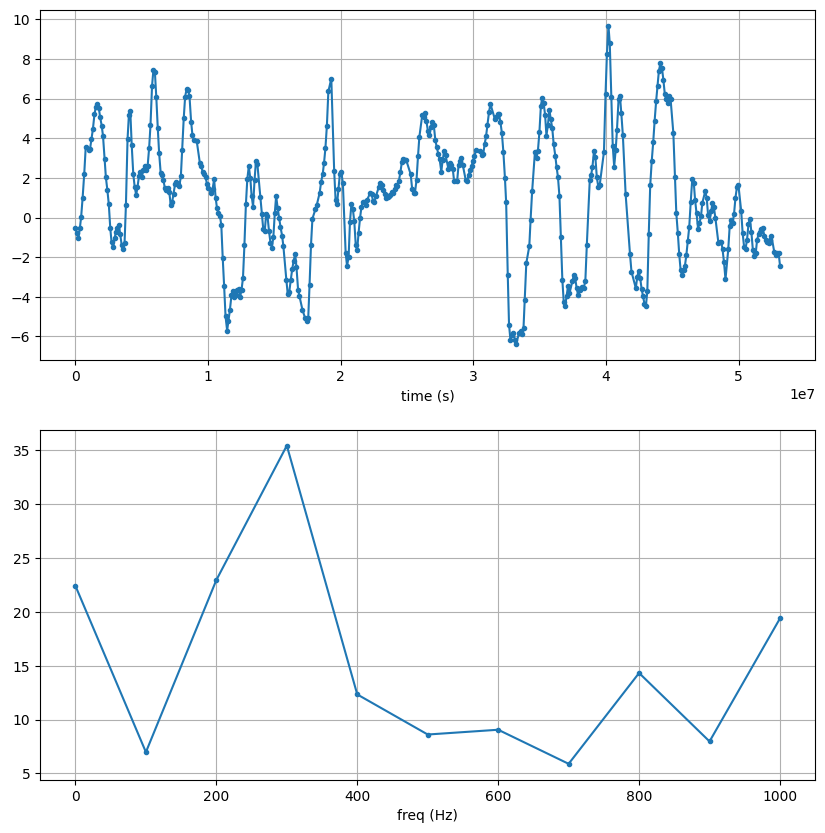

In [13]:
t = m5_fault5["TimeUS"]
y = m5_fault5["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

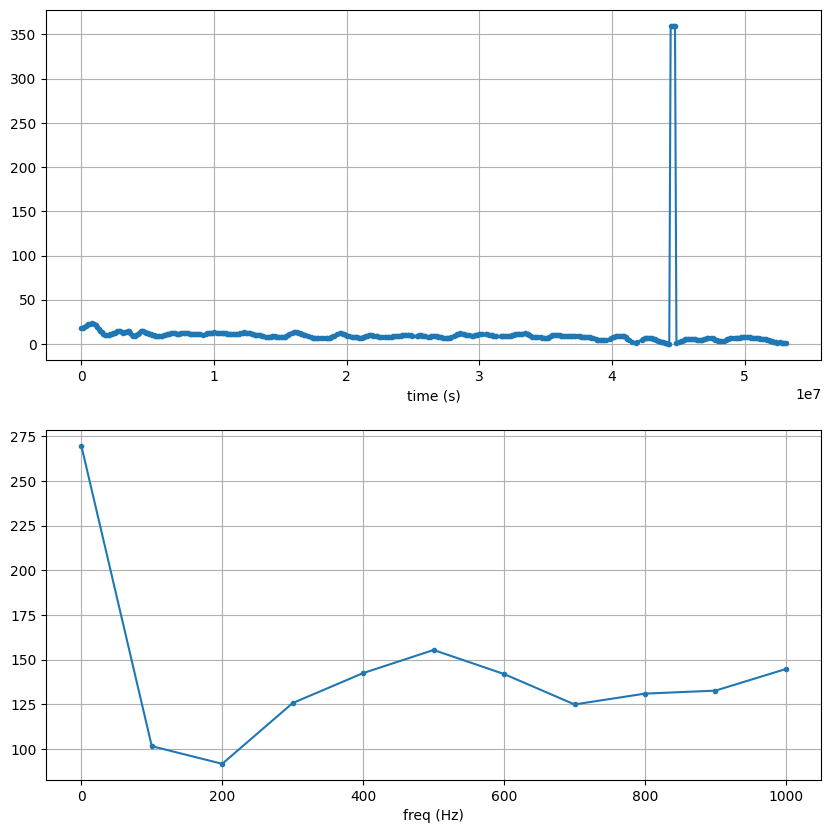

In [14]:
t = m5_fault5["TimeUS"]
y = m5_fault5["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

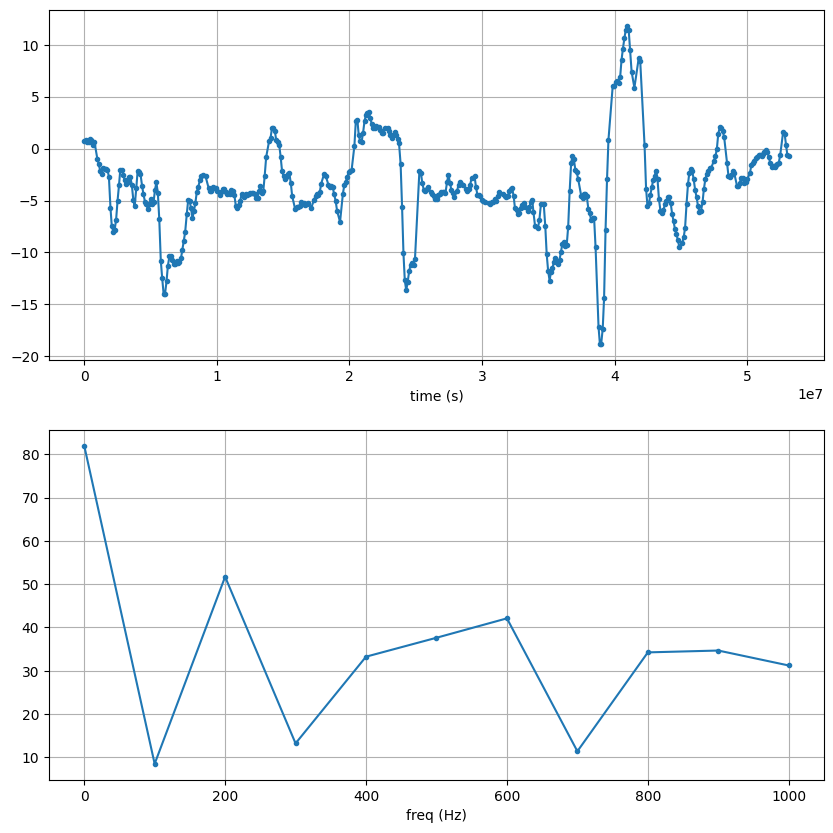

In [15]:
t = m5_fault5["TimeUS"]
y = m5_fault5["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

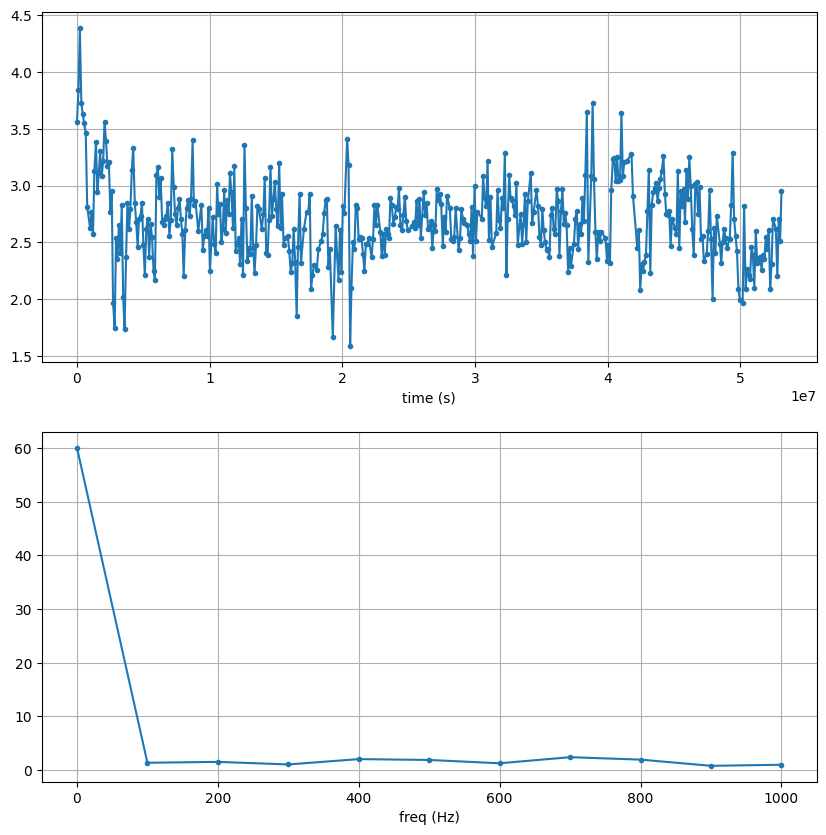

In [16]:
t = m5_fault5["TimeUS"]
y = m5_fault5["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

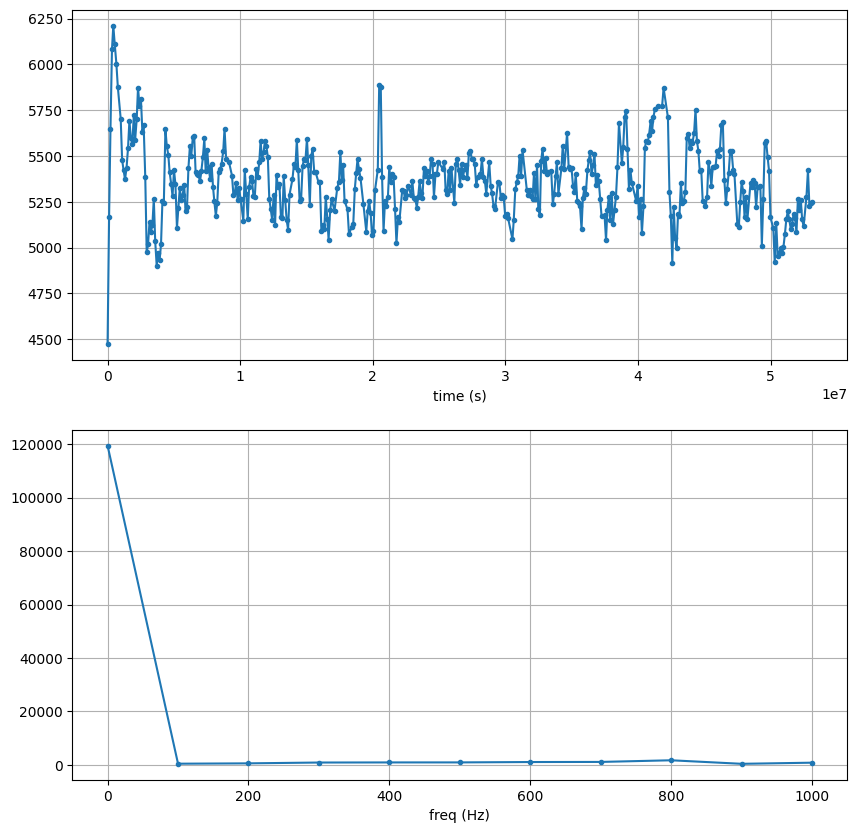

In [17]:
t = m5_fault5["TimeUS"]
y = m5_fault5["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

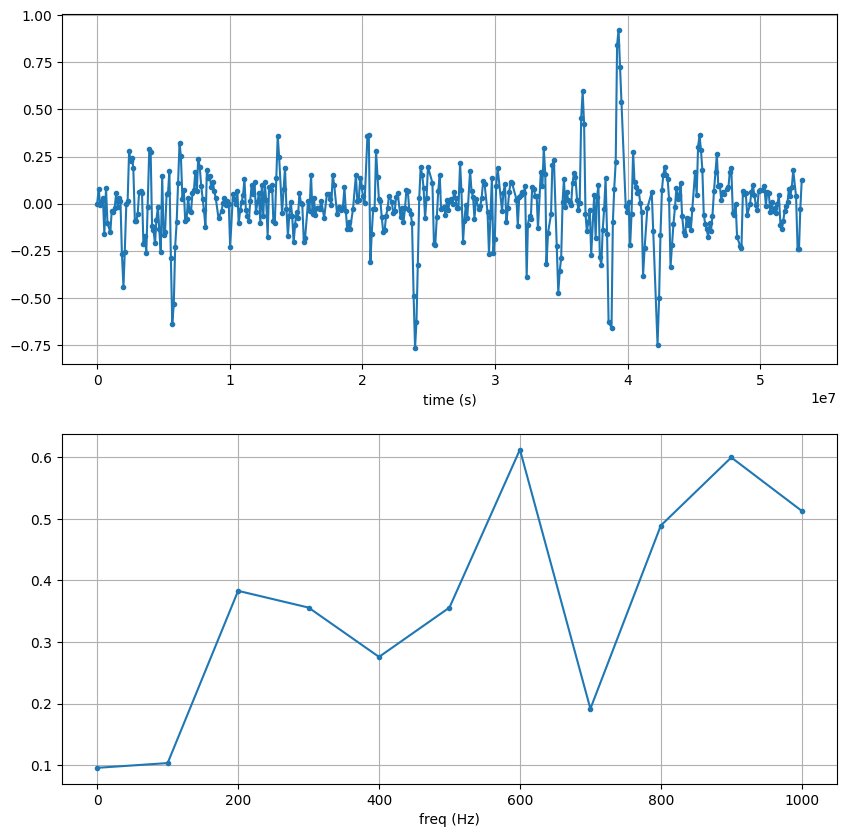

In [18]:
t = m5_fault5["TimeUS"]
y = m5_fault5["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

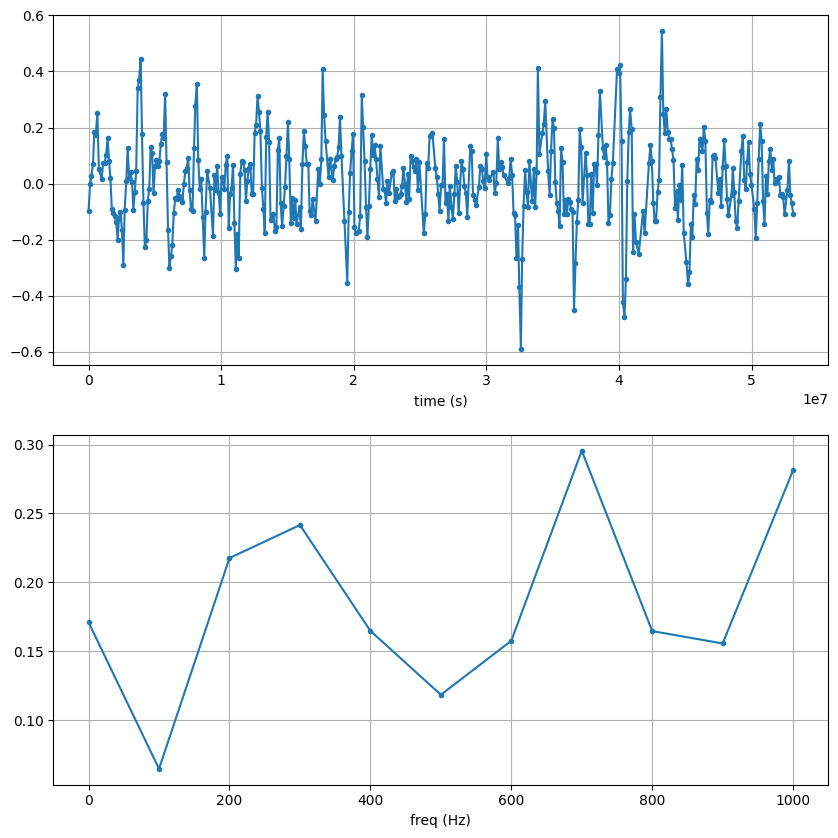

In [19]:
t = m5_fault5["TimeUS"]
y = m5_fault5["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

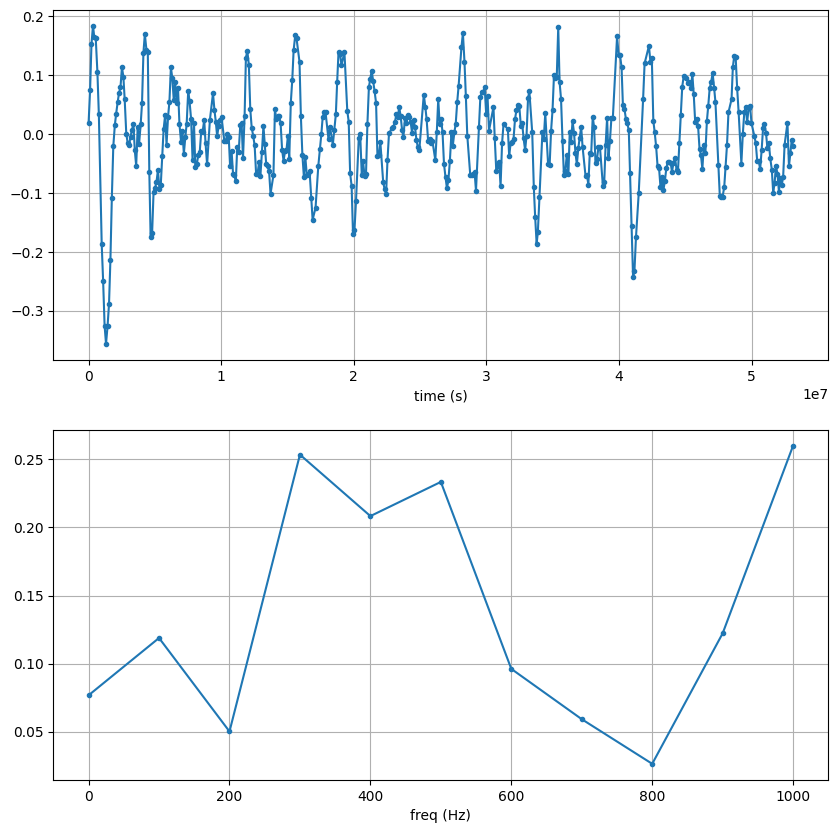

In [20]:
t = m5_fault5["TimeUS"]
y = m5_fault5["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

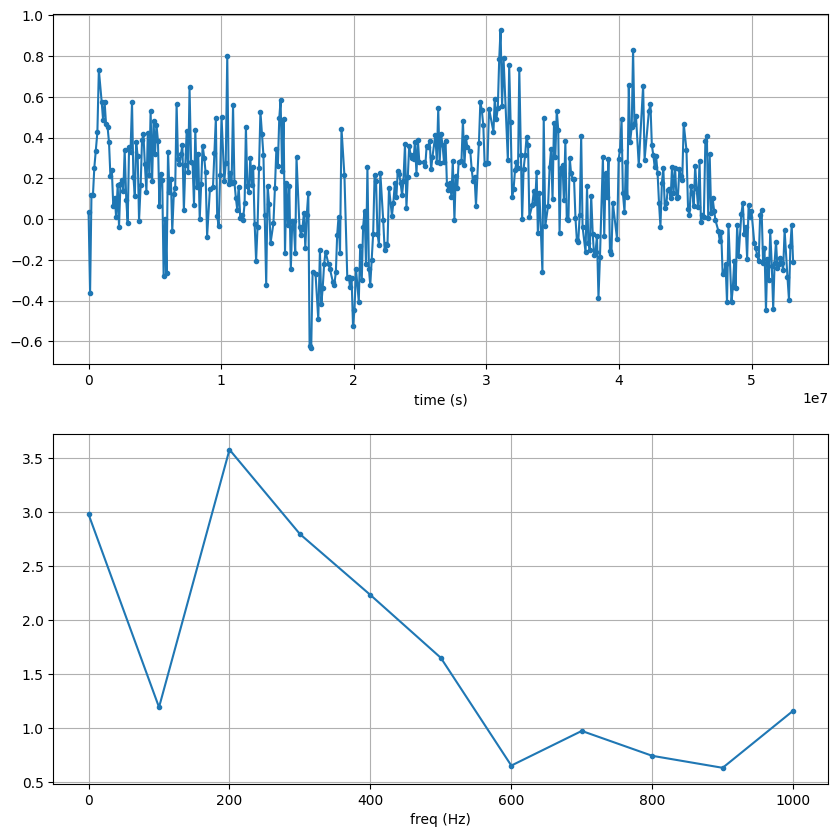

In [21]:
t = m5_fault5["TimeUS"]
y = m5_fault5["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

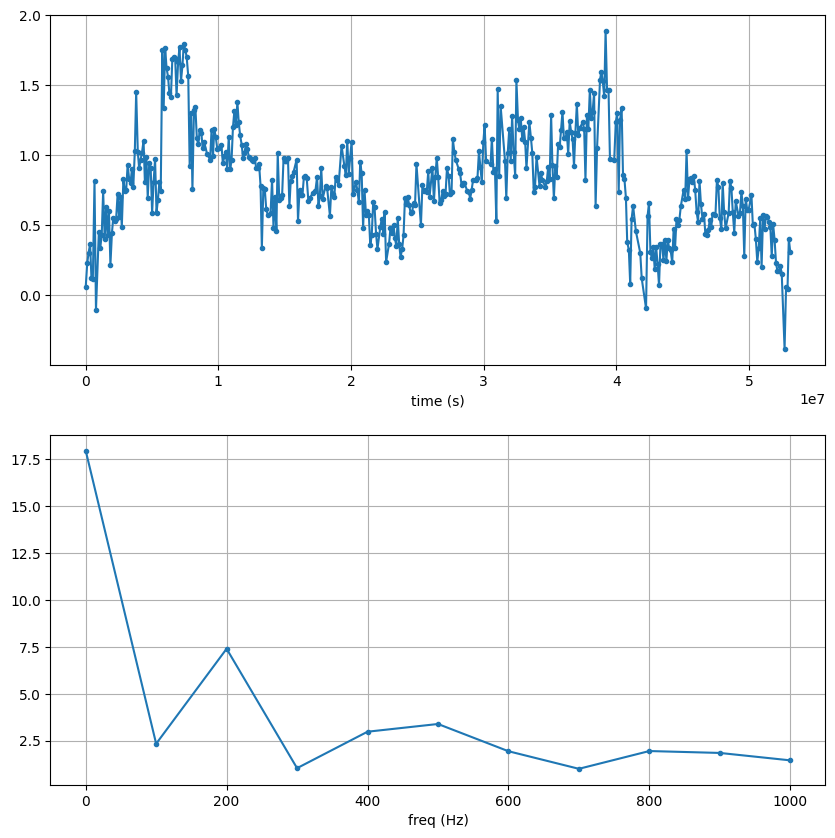

In [22]:
t = m5_fault5["TimeUS"]
y = m5_fault5["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

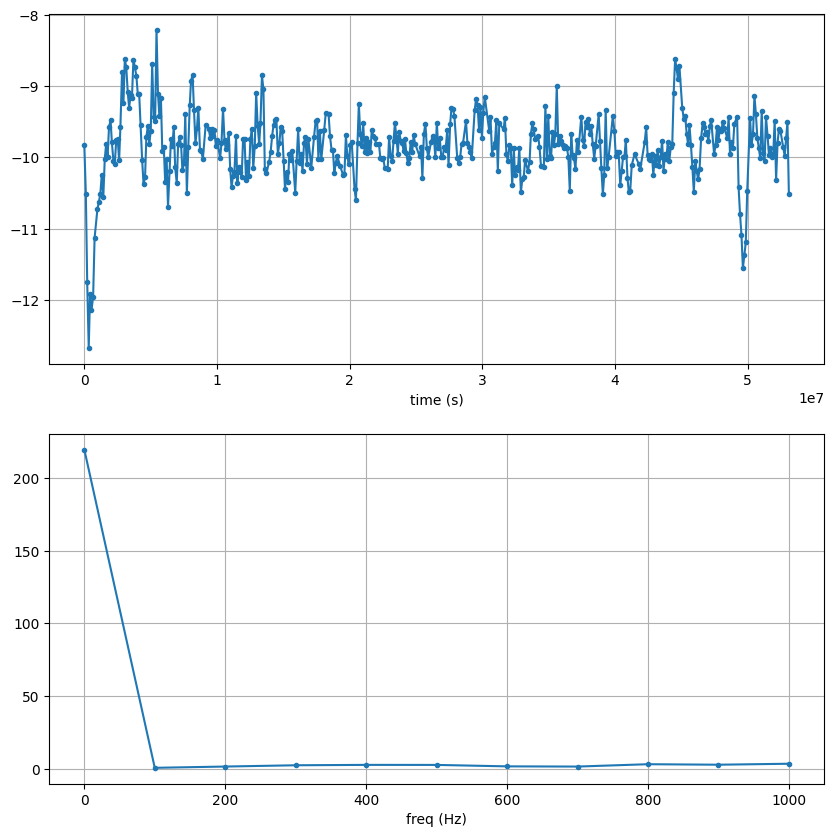

In [23]:
t = m5_fault5["TimeUS"]
y = m5_fault5["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()